# SABR Model Test Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import sys
#sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf
import option_models as opt

np.set_printoptions(precision=3)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
forward = 100
sigma = 0.2
texp = 4
vov = 0.5
rho = -0.5
beta = 1

In [4]:
# Create model
sabr_bsm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=beta)
#sabr_bsm.__dict__

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward, texp)
bsm_vol = sabr_bsm.vol_smile(strike, forward, texp)

price, bsm_vol

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([0.243, 0.239, 0.234, 0.23 , 0.226, 0.223, 0.219, 0.215, 0.212,
        0.209, 0.206, 0.203, 0.2  , 0.198, 0.196, 0.193, 0.191, 0.19 ,
        0.188, 0.186, 0.185, 0.184, 0.183, 0.182, 0.181]))

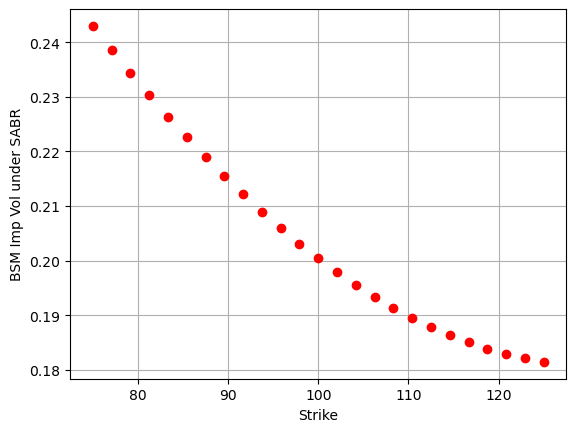

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (2) SABR for $\beta=0$

In [7]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 4
vov = 0.5
rho = -0.5

In [8]:
sabr_norm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=0)
price = sabr_norm.price(strike, forward, texp)
nvol = sabr_norm.vol_smile(strike, forward, texp, model='norm')

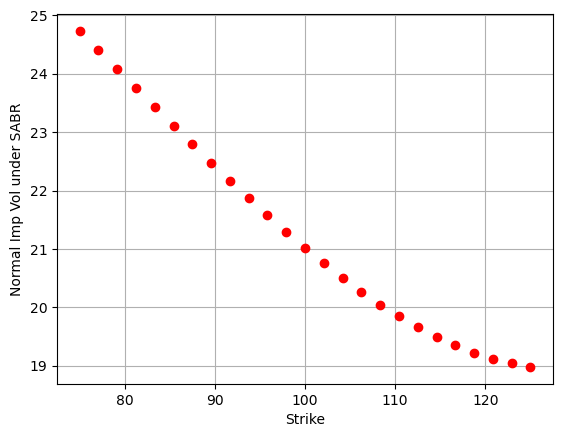

In [9]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (3) Smile calibration to 3 options

In [10]:
strike3 = np.array([90, 100, 110])
price3 = sabr_bsm.price(strike3, forward, texp)
vol3 = sabr_bsm.vol_smile(strike3, forward, texp)

price3, vol3

(array([21.634, 15.885, 11.301]), array([0.215, 0.2  , 0.19 ]))

In [11]:
sabr_bsm.__dict__

{'sigma': 0.2,
 'intr': 0.0,
 'divr': 0.0,
 'is_fwd': False,
 'vov': 0.5,
 'rho': -0.5,
 'beta': 1}

In [12]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(vol3, strike3, forward, texp, is_vol=True)

{'sigma': 0.1999999999944238,
 'vov': 0.5000000000095026,
 'rho': -0.4999999998878092}

In [13]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, texp, is_vol=False)

{'sigma': 0.19999999999442386,
 'vov': 0.5000000000094998,
 'rho': -0.49999999988780885}

## 2. Pricing under MC method

In [14]:
strike = np.linspace(75,125,num=25)
forward = 100

### (1) SABR for $\beta=1$

In [15]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 1}


In [16]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([31.63 , 30.076, 28.557, 27.074, 25.631, 24.23 , 22.869, 21.552,
        20.282, 19.062, 17.889, 16.761, 15.682, 14.653, 13.672, 12.742,
        11.861, 11.03 , 10.249,  9.517,  8.833,  8.197,  7.606,  7.059,
         6.551]))

### (2) SABR for $\beta=0$

In [17]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 0}


In [18]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([34.702, 33.039, 31.399, 29.784, 28.197, 26.64 , 25.114, 23.623,
        22.168, 20.753, 19.379, 18.051, 16.77 , 15.539, 14.361, 13.238,
        12.173, 11.167, 10.221,  9.336,  8.513,  7.75 ,  7.048,  6.403,
         5.813]),
 array([34.864, 33.204, 31.571, 29.964, 28.382, 26.835, 25.322, 23.846,
        22.41 , 21.013, 19.662, 18.355, 17.095, 15.887, 14.733, 13.633,
        12.583, 11.584, 10.638,  9.752,  8.93 ,  8.165,  7.455,  6.799,
         6.198]))

## 3. Pricing under conditional MC method

In [19]:
strike = np.linspace(75,125,num=25)
forward = 100

### (1) SABR for $\beta=1$

In [20]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 1}


In [21]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([31.4  , 29.85 , 28.334, 26.854, 25.414, 24.013, 22.654, 21.338,
        20.067, 18.843, 17.667, 16.54 , 15.464, 14.438, 13.463, 12.541,
        11.67 , 10.85 , 10.081,  9.361,  8.69 ,  8.065,  7.485,  6.948,
         6.451]))

### (2) SABR for $\beta=0$

In [22]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormCondMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 0}


In [23]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([34.702, 33.039, 31.399, 29.784, 28.197, 26.64 , 25.114, 23.623,
        22.168, 20.753, 19.379, 18.051, 16.77 , 15.539, 14.361, 13.238,
        12.173, 11.167, 10.221,  9.336,  8.513,  7.75 ,  7.048,  6.403,
         5.813]),
 array([34.567, 32.911, 31.282, 29.68 , 28.107, 26.566, 25.059, 23.587,
        22.153, 20.76 , 19.41 , 18.105, 16.847, 15.64 , 14.484, 13.383,
        12.338, 11.35 , 10.42 ,  9.549,  8.736,  7.981,  7.283,  6.641,
         6.051]))

## 4. Compare the MC variance between regular vs conditional MC

### Repeat the pricing for 100 times and compare the mean and stdev of the results

In [24]:
strike = np.linspace(75,125,num=25)
forward = 100

In [25]:
price_bsm_hagan = sabr_bsm.price(strike, forward, texp)
price_norm_hagan = sabr_norm.price(strike, forward, texp)

In [26]:
price_bsm_hagan, price_norm_hagan

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([34.702, 33.039, 31.399, 29.784, 28.197, 26.64 , 25.114, 23.623,
        22.168, 20.753, 19.379, 18.051, 16.77 , 15.539, 14.361, 13.238,
        12.173, 11.167, 10.221,  9.336,  8.513,  7.75 ,  7.048,  6.403,
         5.813]))

In [27]:
price_bsm_mc = np.array([sabr_bsm_mc.price(strike, forward, texp) for i in range(100)])
price_bsm_cmc = np.array([sabr_bsm_cmc.price(strike, forward, texp) for i in range(100)])
price_norm_mc = np.array([sabr_norm_mc.price(strike, forward, texp) for i in range(100)])
price_norm_cmc = np.array([sabr_norm_cmc.price(strike, forward, texp) for i in range(100)])

In [28]:
price_bsm_mc.mean(axis=0), price_bsm_cmc.mean(axis=0)

(array([31.48 , 29.932, 28.42 , 26.945, 25.509, 24.113, 22.759, 21.449,
        20.185, 18.966, 17.796, 16.675, 15.603, 14.582, 13.612, 12.692,
        11.824, 11.006, 10.238,  9.518,  8.846,  8.219,  7.637,  7.096,
         6.595]),
 array([31.42 , 29.869, 28.354, 26.874, 25.434, 24.033, 22.674, 21.359,
        20.088, 18.864, 17.689, 16.562, 15.485, 14.46 , 13.486, 12.564,
        11.693, 10.874, 10.105,  9.386,  8.714,  8.09 ,  7.51 ,  6.972,
         6.475]))

In [29]:
price_bsm_mc.std(axis=0), price_bsm_cmc.std(axis=0)

(array([0.354, 0.351, 0.348, 0.344, 0.34 , 0.335, 0.331, 0.326, 0.322,
        0.317, 0.311, 0.305, 0.299, 0.293, 0.287, 0.281, 0.276, 0.27 ,
        0.264, 0.259, 0.253, 0.248, 0.243, 0.238, 0.234]),
 array([0.093, 0.088, 0.084, 0.08 , 0.076, 0.071, 0.067, 0.063, 0.059,
        0.055, 0.051, 0.048, 0.045, 0.042, 0.039, 0.037, 0.034, 0.033,
        0.031, 0.03 , 0.029, 0.028, 0.028, 0.027, 0.027]))

Text(0.5, 1.0, 'Comparison of MC Standard Deviation (BSM)')

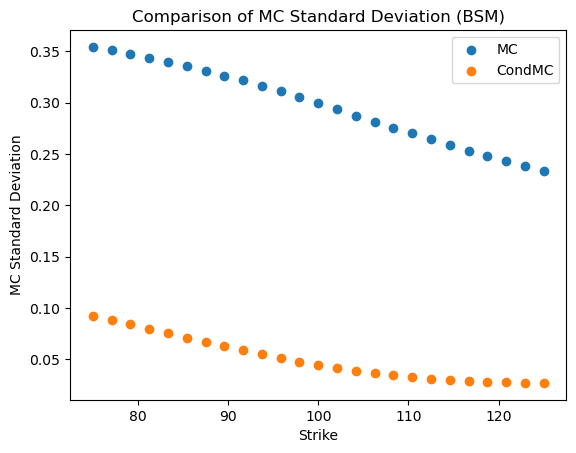

In [30]:
plt.scatter(strike, price_bsm_mc.std(axis=0), label='MC')
plt.scatter(strike, price_bsm_cmc.std(axis=0), label='CondMC')
plt.xlabel('Strike')
plt.ylabel('MC Standard Deviation')
plt.legend()
plt.title('Comparison of MC Standard Deviation (BSM)')

In [31]:
price_norm_mc.mean(axis=0), price_norm_cmc.mean(axis=0)

(array([34.429, 32.782, 31.162, 29.569, 28.007, 26.477, 24.981, 23.522,
        22.1  , 20.719, 19.382, 18.089, 16.844, 15.649, 14.504, 13.414,
        12.378, 11.397, 10.474,  9.607,  8.798,  8.045,  7.348,  6.704,
         6.112]),
 array([34.441, 32.79 , 31.165, 29.568, 28.   , 26.464, 24.962, 23.496,
        22.068, 20.68 , 19.336, 18.037, 16.785, 15.584, 14.435, 13.339,
        12.3  , 11.317, 10.392,  9.525,  8.716,  7.965,  7.271,  6.631,
         6.043]))

In [32]:
price_norm_mc.std(axis=0), price_norm_cmc.std(axis=0)

(array([0.232, 0.229, 0.226, 0.223, 0.22 , 0.216, 0.212, 0.209, 0.205,
        0.201, 0.197, 0.193, 0.189, 0.185, 0.181, 0.177, 0.174, 0.17 ,
        0.166, 0.162, 0.158, 0.153, 0.149, 0.144, 0.14 ]),
 array([0.076, 0.073, 0.071, 0.068, 0.066, 0.063, 0.061, 0.059, 0.057,
        0.055, 0.054, 0.052, 0.051, 0.05 , 0.049, 0.048, 0.048, 0.047,
        0.047, 0.046, 0.046, 0.046, 0.045, 0.044, 0.044]))

Text(0.5, 1.0, 'Comparison of MC Standard Deviation (Norm)')

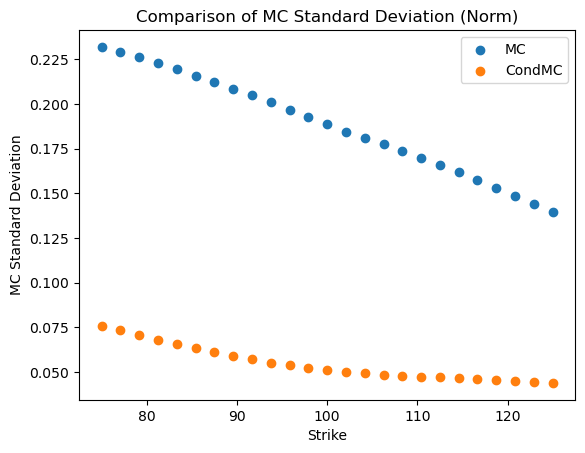

In [33]:
plt.scatter(strike, price_norm_mc.std(axis=0), label='MC')
plt.scatter(strike, price_norm_cmc.std(axis=0), label='CondMC')
plt.xlabel('Strike')
plt.ylabel('MC Standard Deviation')
plt.legend()
plt.title('Comparison of MC Standard Deviation (Norm)')